In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
data=pd.read_csv("suicidedataset.csv")
print(data.head())
print(data.columns)

        Entity  Year  Male suicide rate (age-standardized)  \
0  Afghanistan  1990                                 14.75   
1  Afghanistan  1991                                 14.81   
2  Afghanistan  1992                                 14.80   
3  Afghanistan  1993                                 15.02   
4  Afghanistan  1994                                 15.34   

   Female suicide rate (age-standardized)  Male:female suicide ratio  \
0                                    5.46                       2.70   
1                                    5.43                       2.73   
2                                    5.38                       2.75   
3                                    5.41                       2.78   
4                                    5.50                       2.79   

   Suicide rate - 15-19 years (Male)  Suicide rate - 15-19 years (Female)  \
0                               3.86                                 2.48   
1                               5.14    

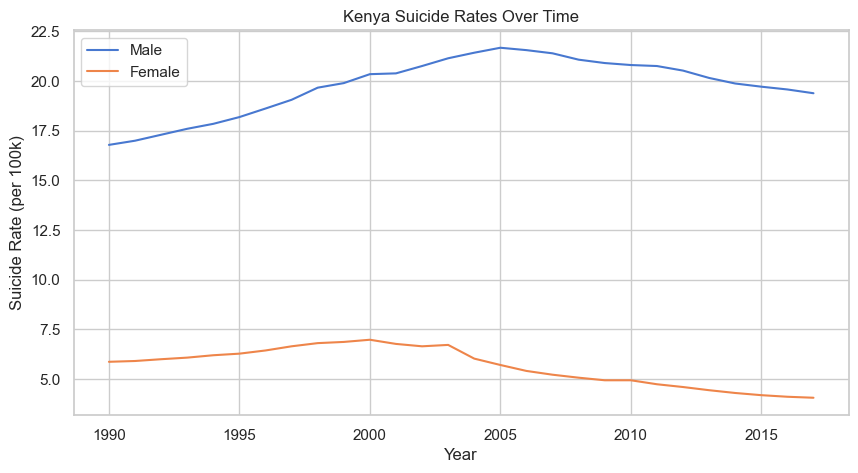

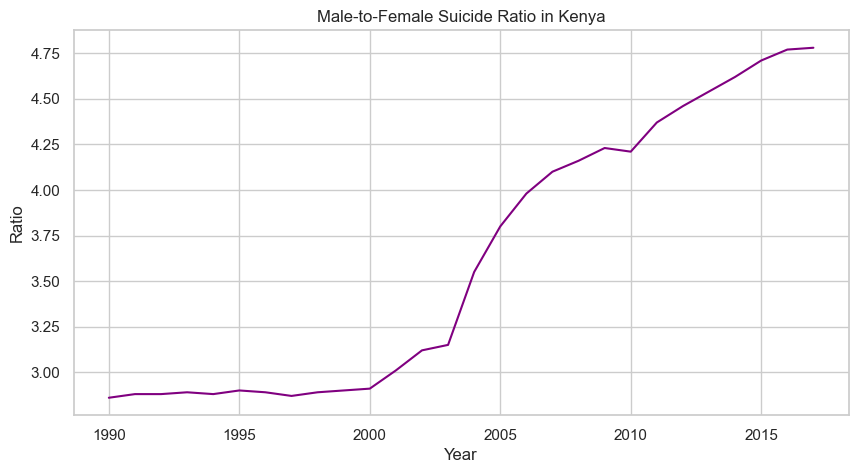

Highest male suicide rate year: 2005 Rate: 21.68
Highest female suicide rate year: 2000 Rate: 6.98


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
data=pd.read_csv("suicidedataset.csv")
# Filter for Kenya only
kenya = data[data["Entity"] == "Kenya"]

# --- 1. Trend of suicide rates over time (both sexes, age-standardized) ---
plt.figure(figsize=(10,5))
plt.plot(kenya["Year"], kenya["Male suicide rate (age-standardized)"], label="Male")
plt.plot(kenya["Year"], kenya["Female suicide rate (age-standardized)"], label="Female")
plt.title("Kenya Suicide Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Suicide Rate (per 100k)")
plt.legend()
plt.show()

# --- 2. Male-to-female ratio over time ---
plt.figure(figsize=(10,5))
plt.plot(kenya["Year"], kenya["Male:female suicide ratio"], color="purple")
plt.title("Male-to-Female Suicide Ratio in Kenya")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.show()

# --- 3. Identify the year with the highest male and female suicide rates ---
max_male = kenya.loc[kenya["Male suicide rate (age-standardized)"].idxmax()]
max_female = kenya.loc[kenya["Female suicide rate (age-standardized)"].idxmax()]

print("Highest male suicide rate year:", max_male["Year"], "Rate:", max_male["Male suicide rate (age-standardized)"])
print("Highest female suicide rate year:", max_female["Year"], "Rate:", max_female["Female suicide rate (age-standardized)"])


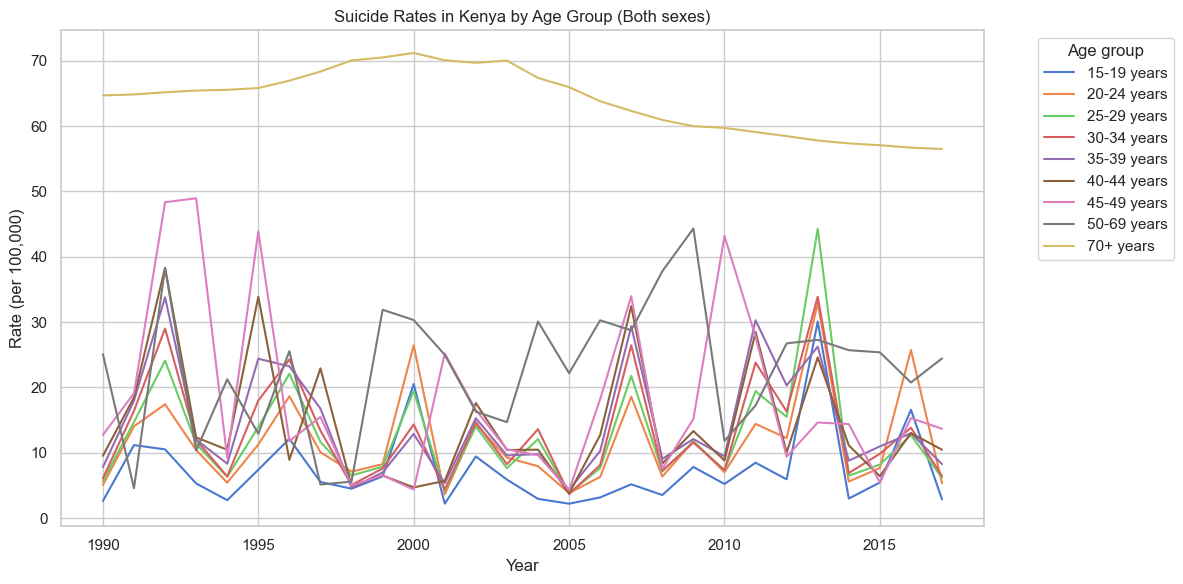

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Reshape the dataset ---
kenya_melted = kenya.melt(
    id_vars=["Year"],
    value_vars=[
        'Suicide rate - 15-19 years (Both sexes)',
        'Suicide rate - 20-24 years (Both sexes)',
        'Suicide rate - 25-29 years (Both sexes)',
        'Suicide rate - 30-34 years (Both sexes)',
        'Suicide rate - 35-39 years (Both sexes)',
        'Suicide rate - 40-44 years (Both sexes)',
        'Suicide rate - 45-49 years (Both sexes)',
        'Suicide rate - 50-69 years (Both sexes)',
        'Suicide rate - 70+ years (Both sexes)',
    ],
    var_name="Age group",
    value_name="Suicide rate"
)

# --- Clean the age group labels ---
kenya_melted["Age group"] = kenya_melted["Age group"].str.replace("Suicide rate - ", "").str.replace(" (Both sexes)", "")

# --- Plot ---
plt.figure(figsize=(12,6))
sns.lineplot(data=kenya_melted, x="Year", y="Suicide rate", hue="Age group")
plt.title("Suicide Rates in Kenya by Age Group (Both sexes)")
plt.ylabel("Rate (per 100,000)")
plt.xlabel("Year")
plt.legend(title="Age group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



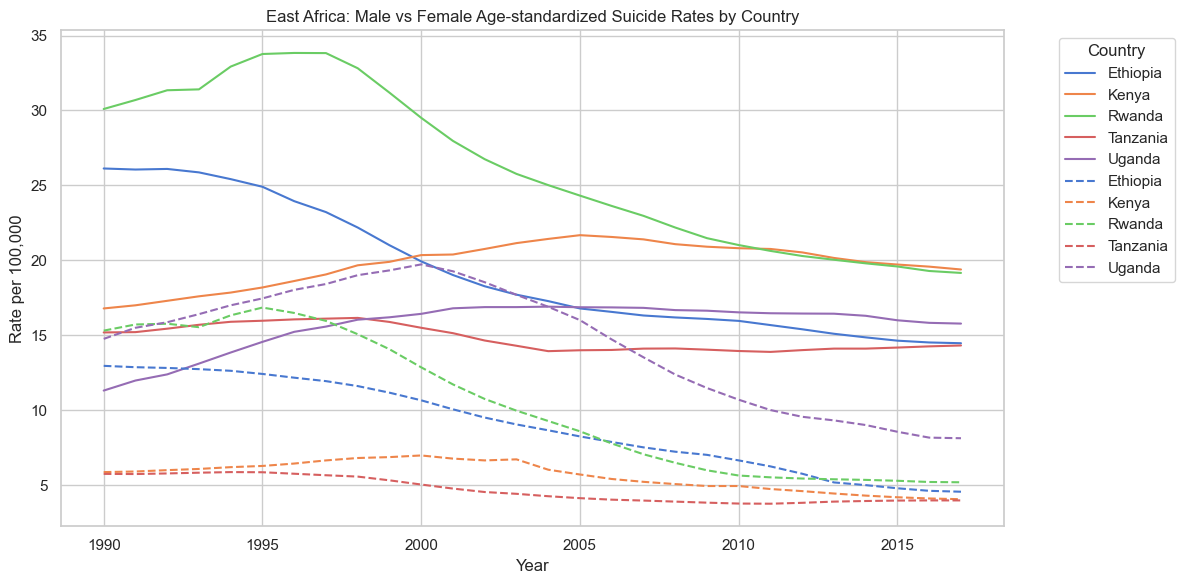

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Male suicide rate
sns.lineplot(
    data=region,
    x="Year",
    y="Male suicide rate (age-standardized)",
    hue="Entity",
    errorbar=None
)

# Female suicide rate
sns.lineplot(
    data=region,
    x="Year",
    y="Female suicide rate (age-standardized)",
    hue="Entity",
    linestyle="--",
    errorbar=None
)

plt.title("East Africa: Male vs Female Age-standardized Suicide Rates by Country")
plt.ylabel("Rate per 100,000")
plt.xlabel("Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


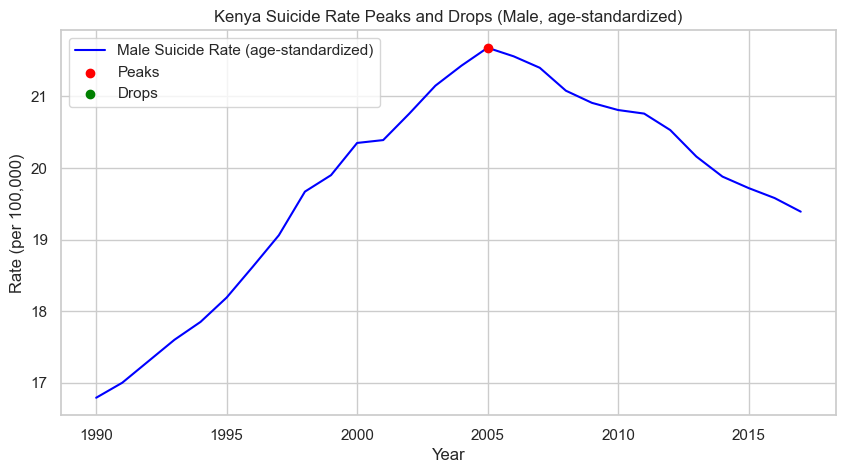

Peak years: [2005]
Drop years: []


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# We'll use both sexes 15-19 as an example; you can change to any column
series = kenya["Male suicide rate (age-standardized)"].values
years = kenya["Year"].values

# Find peaks (local maxima)
peaks, _ = find_peaks(series, distance=3)  # distance avoids too-close points

# Find drops (local minima) by inverting the signal
drops, _ = find_peaks(-series, distance=3)

# Plot
plt.figure(figsize=(10,5))
plt.plot(years, series, label="Male Suicide Rate (age-standardized)", color="blue")
plt.scatter(years[peaks], series[peaks], color="red", label="Peaks", zorder=5)
plt.scatter(years[drops], series[drops], color="green", label="Drops", zorder=5)
plt.title("Kenya Suicide Rate Peaks and Drops (Male, age-standardized)")
plt.xlabel("Year")
plt.ylabel("Rate (per 100,000)")
plt.legend()
plt.show()

# Print the years of peaks and drops
print("Peak years:", years[peaks])
print("Drop years:", years[drops])


In [13]:
import pandas as pd

# --- 1. Descriptive stats ---
highlights = kenya.describe()

# --- 2. First vs last year trend (Both sexes 15-19 as example) ---
first_val = kenya.iloc[0]["Male suicide rate (age-standardized)"]
last_val = kenya.iloc[-1]["Male suicide rate (age-standardized)"]
change_pct = ((last_val - first_val) / first_val) * 100

# --- 3. Gender averages ---
male_avg = kenya["Male suicide rate (age-standardized)"].mean()
female_avg = kenya["Female suicide rate (age-standardized)"].mean()
ratio = male_avg / female_avg

# --- 4. Highest suicide age group ---
age_cols = [c for c in kenya.columns if "Suicide rate - " in c and "Both sexes" in c]
age_means = kenya[age_cols].mean().sort_values(ascending=False)

print("📊 Statistical Highlights (Kenya)")
print("---------------------------------")
print("Descriptive stats:\n", highlights)
print(f"\nTrend (Male age-standardized): {first_val:.2f} → {last_val:.2f} ({change_pct:.2f}% change)")
print(f"\nAverage Male Rate: {male_avg:.2f}")
print(f"Average Female Rate: {female_avg:.2f}")
print(f"Male-to-Female Ratio: {ratio:.2f}")
print("\nAge groups ranked by highest average suicide rate:")
print(age_means)


📊 Statistical Highlights (Kenya)
---------------------------------
Descriptive stats:
               Year  Male suicide rate (age-standardized)  \
count    28.000000                             28.000000   
mean   2003.500000                             19.768571   
std       8.225975                              1.456423   
min    1990.000000                             16.790000   
25%    1996.750000                             18.950000   
50%    2003.500000                             20.030000   
75%    2010.250000                             20.835000   
max    2017.000000                             21.680000   

       Female suicide rate (age-standardized)  Male:female suicide ratio  \
count                               28.000000                  28.000000   
mean                                 5.642500                   3.618214   
std                                  0.957062                   0.748955   
min                                  4.060000                   2.86

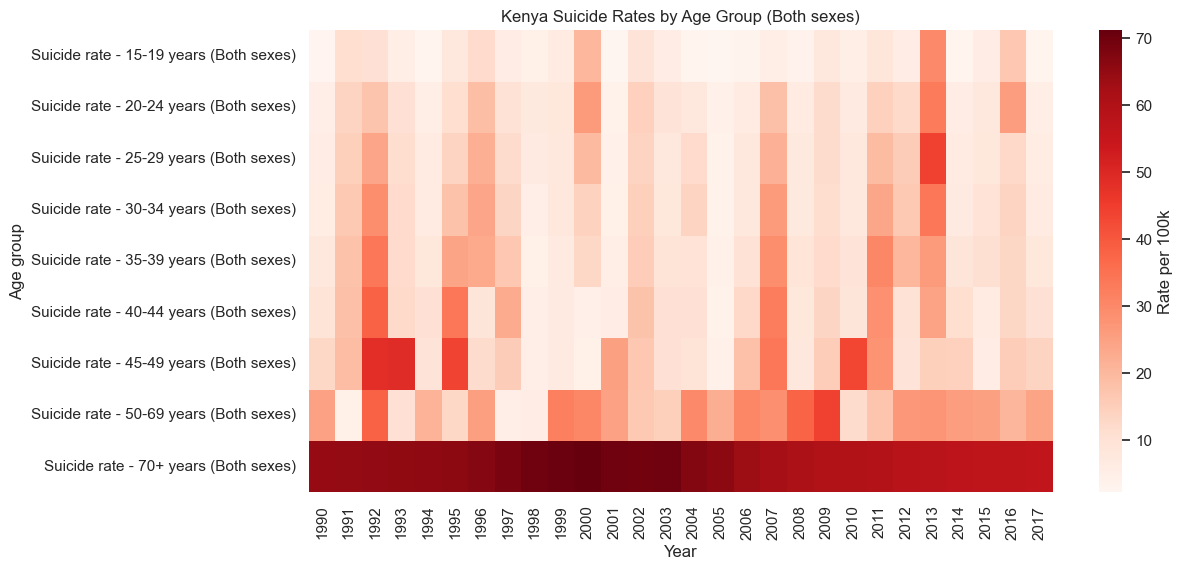

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select age group columns (Both sexes only)
age_cols = [c for c in kenya.columns if "Both sexes" in c and "Suicide rate -" in c]

# Reshape for heatmap
heatmap_data = kenya[["Year"] + age_cols].set_index("Year")

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data.T, cmap="Reds", annot=False, cbar_kws={'label': 'Rate per 100k'})
plt.title("Kenya Suicide Rates by Age Group (Both sexes)")
plt.ylabel("Age group")
plt.xlabel("Year")
plt.show()


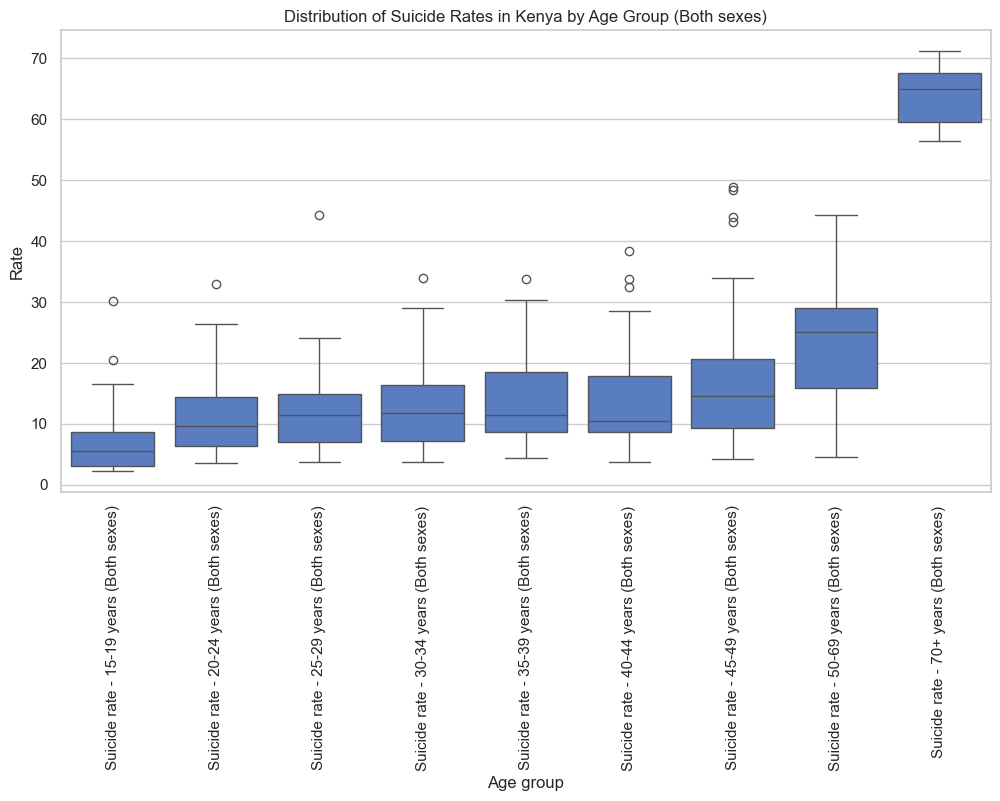

In [16]:
# Melt for seaborn
melted = kenya.melt(id_vars="Year", value_vars=age_cols, var_name="Age group", value_name="Rate")

plt.figure(figsize=(12,6))
sns.boxplot(data=melted, x="Age group", y="Rate")
plt.xticks(rotation=90)
plt.title("Distribution of Suicide Rates in Kenya by Age Group (Both sexes)")
plt.show()


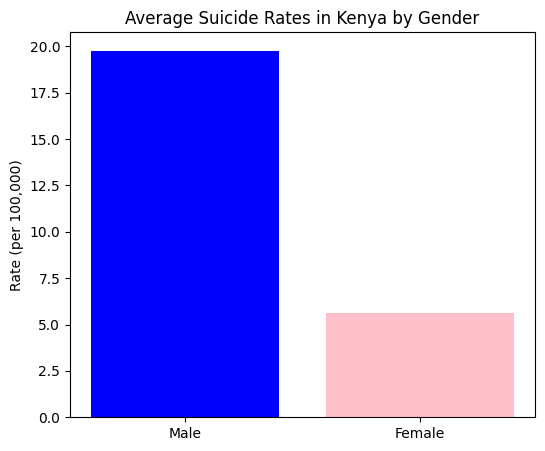

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset again (update the path to where your CSV is saved)
data = pd.read_csv("suicidedataset.csv")

# Filter for Kenya
kenya = data[data["Entity"] == "Kenya"]

# Average male vs female suicide rate across all years
gender_means = {
    "Male": kenya["Male suicide rate (age-standardized)"].mean(),
    "Female": kenya["Female suicide rate (age-standardized)"].mean()
}

# Plot
plt.figure(figsize=(6,5))
plt.bar(gender_means.keys(), gender_means.values(), color=["blue", "pink"])
plt.title("Average Suicide Rates in Kenya by Gender")
plt.ylabel("Rate (per 100,000)")
plt.show()

